<a href="https://colab.research.google.com/github/PSourabh97/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Objective of our Project-**

## *   Observasion of factors which effect the Bike demand in our dataset.
## *   Selection the best model for prediction. 
## * Count of Bike demand w.r.t 'Hour', 'Seasons', 'Month'.

# **Let's start our project by mounting the input data-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

In [ ]:
# Our Dataframe-

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction- SOURABH PRAMANIK/SeoulBikeData.csv', encoding= 'unicode_escape')

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Let's at first create two different columns 'day of the week' and 'month' column from the date column**

In [ ]:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of the Week
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday


In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of the Week,month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1


In [ ]:
# Shape of the dataset

df.shape

(8760, 16)

### **Let's understand the count of bike sharing with respect to "Season", "Days of the week" and on holidays by using the count plot -**

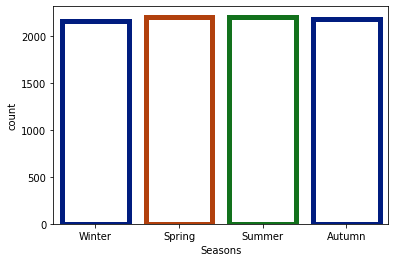

In [ ]:
ax = sns.countplot(x="Seasons", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

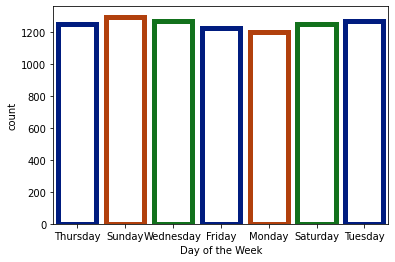

In [ ]:
ax = sns.countplot(x="Day of the Week", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
# plt.xticks(rotation=75,fontsize=11)


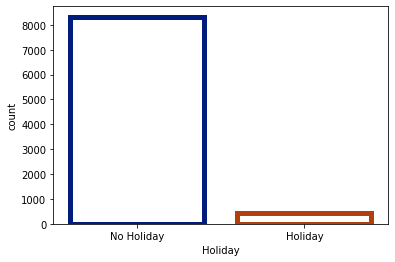

In [ ]:
ax = sns.countplot(x="Holiday", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

### **Let's do the one hot encoding of "holiday" column -**

In [ ]:
dummies = pd.get_dummies(df.Holiday,drop_first=True)
merged = pd.concat([df,dummies], axis=1)
merged.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of the Week,month,No Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,1


In [ ]:
# Dropping the original column 'Holiday' and 'Date' column -

df_copy= merged.drop(['Holiday','Date'], axis=1)
df_copy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Functioning Day,Day of the Week,month,No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,Yes,Thursday,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,Yes,Thursday,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,Yes,Thursday,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,Yes,Thursday,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,Yes,Thursday,1,1


In [ ]:
# Checking the null values and datatype of each column -

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
 12  Day of the Week            8760 non-null   object 
 13  month                      8760 non-null   int64

**No Null values present.**

In [ ]:
# Let's check the statistical values of the numerical columns-

df_copy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,No Holiday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.950685
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.216537
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


## **Let's check the outliers by using the boxplot -**

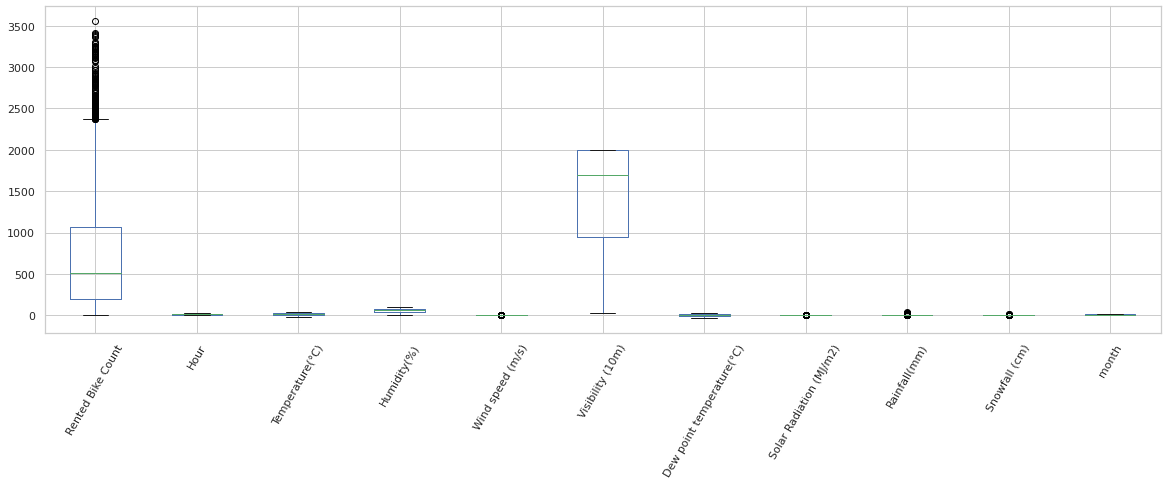

In [ ]:
sns.set_theme(style="whitegrid")
df.plot(kind='box',figsize=(20,6))
plt.xticks(rotation=60)
plt.show()

**Almost no outliers present in independent columns.**

### **Let's uderstand the relation between 'Hour', 'Month', 'Temperature' and 'Season' w.r.t 'Rented Bike Count' by using catplot -**

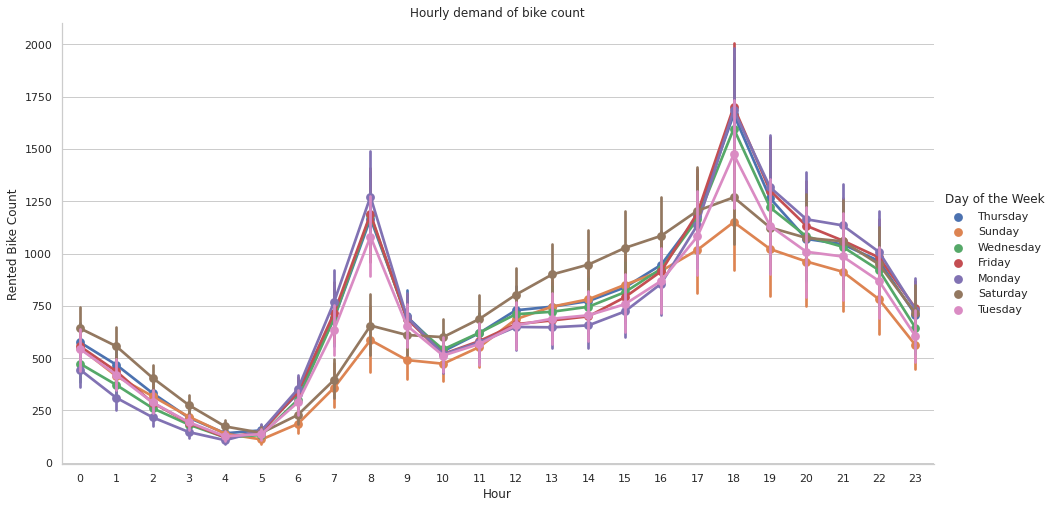

In [ ]:
sns.catplot(data=df_copy,x='Hour',y='Rented Bike Count',hue='Day of the Week', kind='point',height=7, aspect=1.9)
plt.title("Hourly demand of bike count")
plt.show()

**Except saturday and sunday bike demand increases around 8 am and 6 pm.**

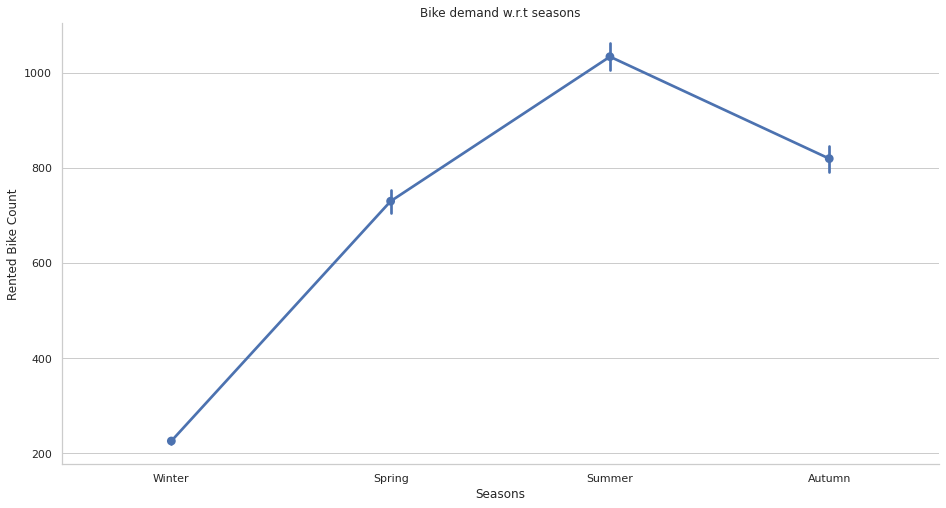

In [ ]:
sns.catplot(data=df_copy,x='Seasons',y='Rented Bike Count', kind='point',height=7, aspect=1.9)
plt.title("Bike demand w.r.t seasons")
plt.show()

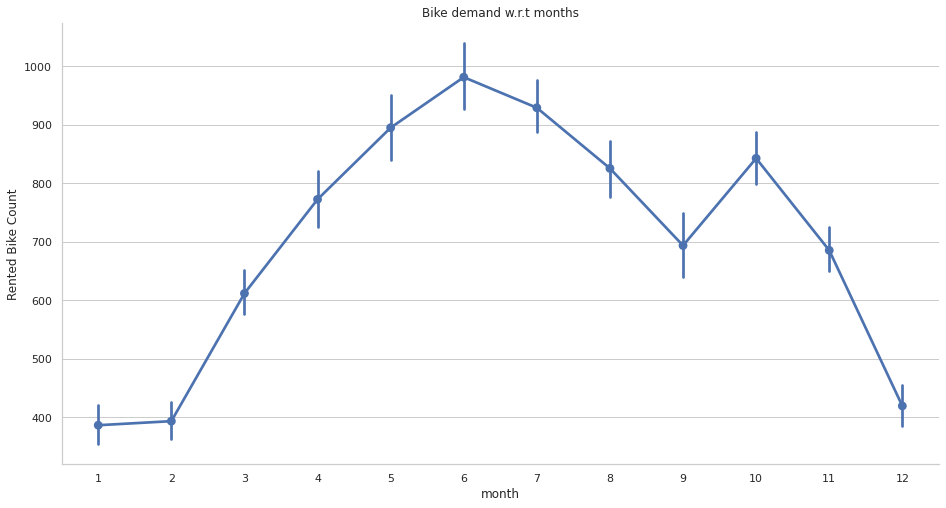

In [ ]:
sns.catplot(data=df_copy,x='month',y='Rented Bike Count', kind='point',height=7, aspect=1.9)
plt.title("Bike demand w.r.t months")
plt.show()

**We can see from the above graphs that demand of bikes is minimum during winter season.**

In [ ]:
# Printing the value of Maximum and Minimum temperature -

Max_temp = max(df_copy['Temperature(°C)'])
Min_temp = min(df_copy['Temperature(°C)'])

print(f'max temp is = {Max_temp}')
print(f'min temp is = {Min_temp}')

max temp is = 39.4
min temp is = -17.8


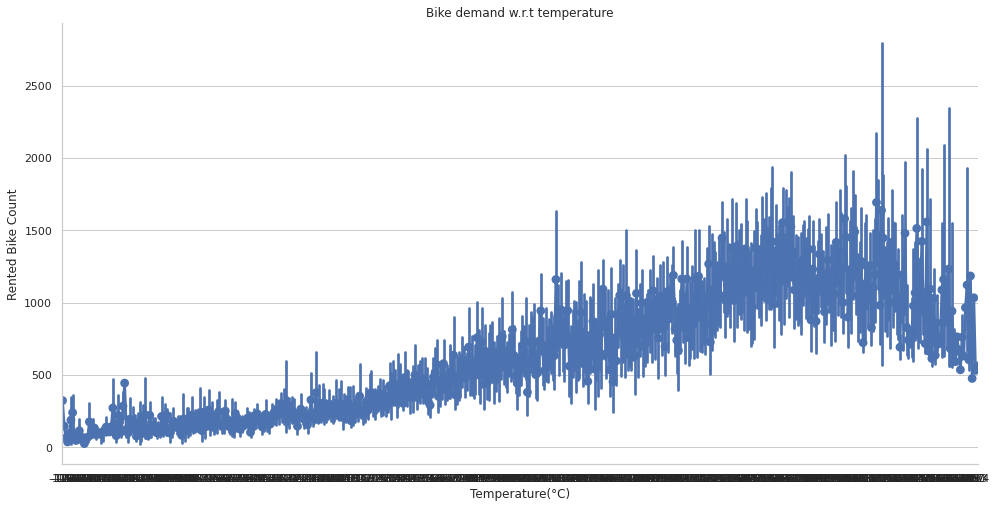

In [ ]:
# Plotting the graph between bike count and increasing temperature-

sns.catplot(data=df_copy,x='Temperature(°C)',y='Rented Bike Count', kind='point',height=7, aspect=2)
plt.title("Bike demand w.r.t temperature")
plt.show()

**We can see in above graph that at very low and high temperature bike count is decreasing.**

**Let's convert some columns to categorical columns -**

In [ ]:
cols = ['Hour','Seasons','Day of the Week','month','Functioning Day']

for col in cols:
  df_copy[col] = df_copy[col].astype('category')

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Functioning Day            8760 non-null   category
 12  Day of the Week            8760 non-null   category
 13  month                      8760 n

## **Let's check the correlation between the variables by using heatmap -**

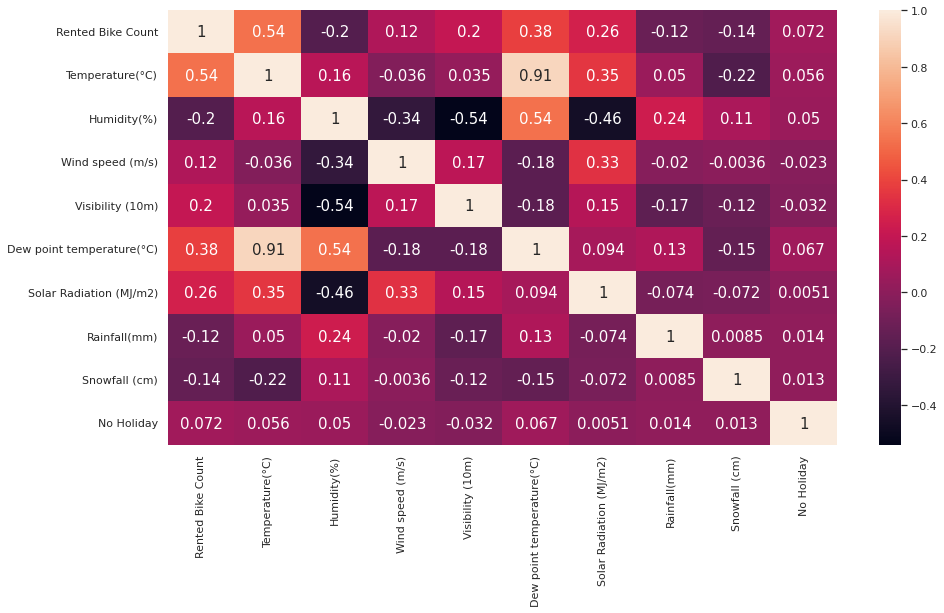

In [ ]:
# correlation
corr= df_copy.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, annot_kws={'size':15})
plt.show()

**Temperature and Due Point Temperature is highly correlated columns.So we can drop one of the column.**

In [ ]:
df_copy.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Functioning Day', 'Day of the Week', 'month', 'No Holiday'],
      dtype='object')

**Let's do the one hot encoding of the categorical columns -**

In [ ]:
cols = ['Hour','Seasons','Day of the Week','month','Functioning Day']

final_df = df_copy

def one_hot_encoding(data, column):
  data = pd.concat([data , pd.get_dummies(data[column],prefix=column, drop_first= True)] , axis=1)
  data = data.drop([column], axis=1)
  return data

for col in cols:
  final_df = one_hot_encoding(final_df, col)

final_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),No Holiday,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day of the Week_Monday,Day of the Week_Saturday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Functioning Day_Yes
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## **Checking the distribution of some numerical columns -**

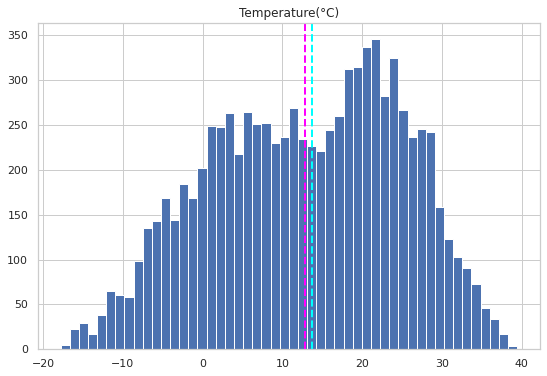

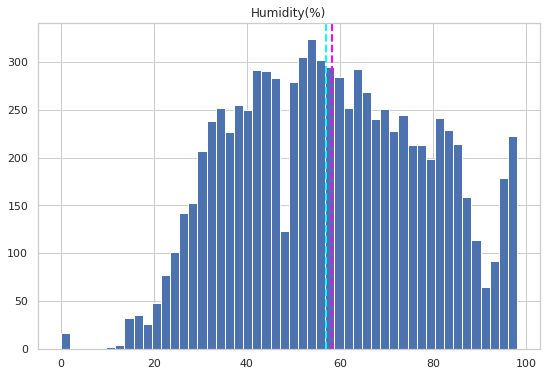

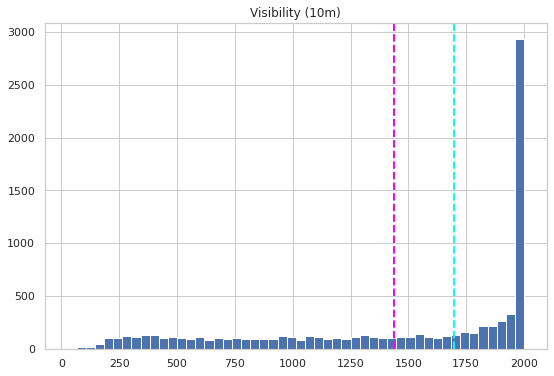

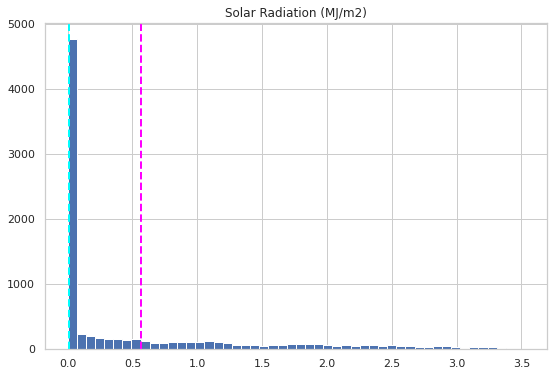

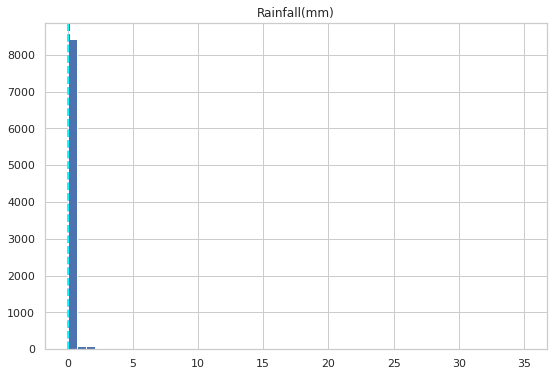

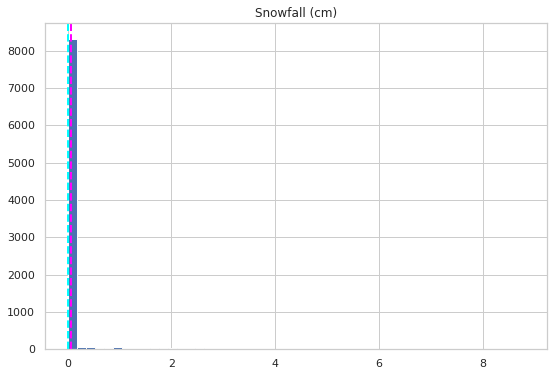

In [ ]:
Check_distribution = ['Temperature(°C)','Humidity(%)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

for col in Check_distribution:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_copy[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

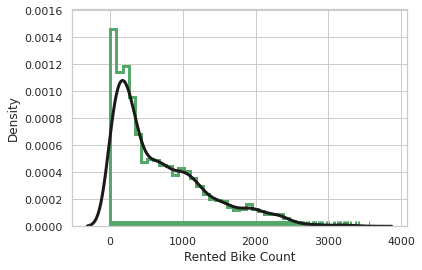

In [ ]:
ax = sns.distplot(final_df['Rented Bike Count'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [ ]:
final_df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

In [ ]:
final_df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: Rented Bike Count, Length: 2166, dtype: int64

### **From  the above graphs we can see that the graphs are either right skewed or left skewed . So for the normal distribution of the values we have to perform log transformation.**

## **Below are the some type of method or way to deal above type of problem.**

square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

**Our 'Rented Bike Count' has some zero values. So before using log transformation we will add some constant term with each value.**

In [ ]:
final_df['Rented Bike Count']=final_df['Rented Bike Count']+2

final_df['Solar Radiation (MJ/m2)']=final_df['Solar Radiation (MJ/m2)']+2   #right skew

final_df['Visibility (10m)']=final_df['Visibility (10m)']+2  #left skew

In [ ]:
final_df['Bike Count'] = np.log10(final_df['Rented Bike Count'])

final_df['log Solar Radiation (MJ/m2)'] = np.log10(final_df['Solar Radiation (MJ/m2)'])

final_df['log Visibility (10m)'] = np.log10(max(final_df['Visibility (10m)'] + 1) - final_df['Visibility (10m)'])

final_df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),No Holiday,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day of the Week_Monday,Day of the Week_Saturday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Functioning Day_Yes,Bike Count,log Solar Radiation (MJ/m2),log Visibility (10m)
0,256,-5.2,37,2.2,2002,-17.6,2.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.408240,0.30103,0.0
1,206,-5.5,38,0.8,2002,-17.6,2.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.313867,0.30103,0.0
2,175,-6.0,39,1.0,2002,-17.7,2.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.243038,0.30103,0.0
3,109,-6.2,40,0.9,2002,-17.6,2.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.037426,0.30103,0.0
4,80,-6.0,36,2.3,2002,-18.6,2.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.903090,0.30103,0.0


## **Let's see the distribution after the log transformation-**

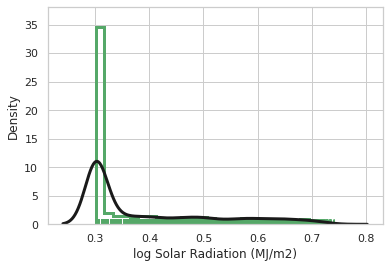

In [ ]:
ax = sns.distplot(final_df['log Solar Radiation (MJ/m2)'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

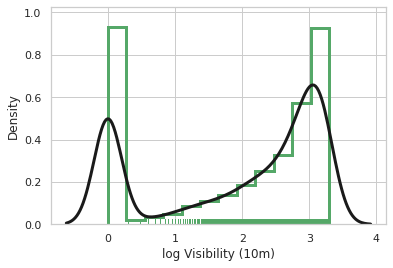

In [ ]:
ax = sns.distplot(final_df['log Visibility (10m)'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

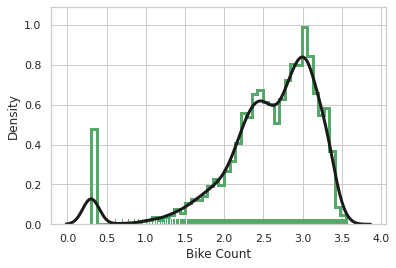

In [ ]:
ax = sns.distplot(final_df['Bike Count'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

# **Splitting of Independent and Dependent variables -**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

**As we have observed that some of the columns are negatively or very less correlated with the dependent vaariable. So will drop those columns.**

In [ ]:
# Independent variables

X = final_df.drop(['Rented Bike Count','Bike Count','Dew point temperature(°C)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Visibility (10m)'], axis=1)

In [ ]:
X

,Temperature(°C),Humidity(%),Rainfall(mm),Snowfall (cm),No Holiday,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Day of the Week_Monday,Day of the Week_Saturday,Day of the Week_Sunday,Day of the Week_Thursday,Day of the Week_Tuesday,Day of the Week_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Functioning Day_Yes,log Solar Radiation (MJ/m2),log Visibility (10m)
0,-5.2,37,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.000000
1,-5.5,38,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.000000
2,-6.0,39,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.000000
3,-6.2,40,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.000000
4,-6.0,36,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.30103,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.30103,2.029384
8756,3.4,37,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.30103,0.000000
8757,2.6,39,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.30103,1.518514
8758,2.1,41,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.30103,2.152288


In [ ]:
# Dependent Variable
y = final_df['Bike Count']

## **Splitting the data into test and train-**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30)

## **Scaling of independent variables -**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [ ]:
X_train

array([[0.4150613 , 0.52040816, 0.        , ..., 1.        , 0.36937999,
        0.64646718],
       [0.50963222, 0.89795918, 0.        , ..., 0.        , 0.        ,
        0.76061942],
       [0.67075306, 0.42857143, 0.        , ..., 1.        , 0.98199223,
        0.        ],
       ...,
       [0.31523643, 0.73469388, 0.        , ..., 1.        , 0.        ,
        0.91181627],
       [0.6234676 , 0.92857143, 0.        , ..., 1.        , 0.        ,
        0.97297368],
       [0.82311734, 0.74489796, 0.        , ..., 1.        , 0.        ,
        0.55608979]])

# **Now we will fit our data in 5 different models and hypertune and will check the model performance -**

1. **Linear Regression**
2. **Lasso Regression**
3. **Decision Tree**
4. **Random Forest**
5. **XGBoost Algorithm** 

# **1. Implementing Linear Regression -**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

param_dict_lr = {}

## **Applying GridSearchCv-**

In [ ]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='neg_mean_squared_error', return_train_score=True)

lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
lr_score = lr_grid.cv_results_
print('Testing score: ',lr_score['mean_test_score'])
print('Training score : ', lr_score['mean_train_score'])

Testing score:  [-0.06904201]
Training score :  [-0.06674867]


**Training and the Test score is almost same . That means no overfitting and underfitting.**

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.838679507654975

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 : 0.6326705123041109
Adjusted R2 :  0.6253980729126162
MSE : 145943.18187164475
MAE : 244.0892184735524
RMSE : 382.02510633680185


### Let's see the visual representation between Actual and Predicted value by using scatterplot-

Text(0, 0.5, 'Predicted bike count')

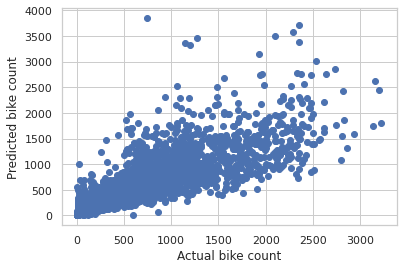

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')

**There is not a good linear relationship between actual and predicted values.**

# **2. Implementing Lasso Regression -**

In [ ]:
from sklearn.linear_model import Lasso

lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.7770418384202284

In [ ]:
y_pred_l = lasso.predict(X_test)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4751277879083552
Adjusted R2 :  0.4647362961316961


### Let's see the visual representation between Actual and Predicted value by using scatterplot-

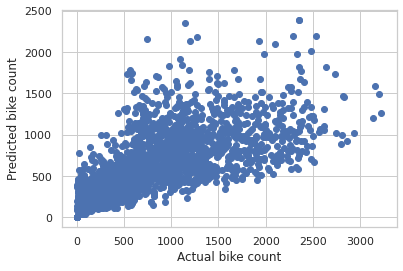

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_l))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')
plt.show()

### **Applying GridSearchCv for Lasso  -**

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -0.06910118808943258


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 146226.9422614302
MAE : 244.6164459502476
RMSE : 382.3963157006487
R2 : 0.6319563058761604
Adjusted R2 :  0.6246697265282117


### Let's see the visual representation between Actual and Predicted value after Hypertuning by using scatterplot-

Text(0, 0.5, 'Predicted bike count')

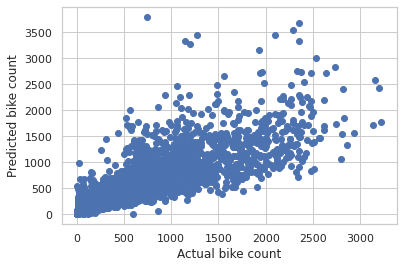

In [ ]:
plt.scatter(10**(y_test), 10**(y_pred_lasso))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')

**Not getting a good relation between actual and predicted value even after hypertuning.**

# **3. Implementing Decision tree Algorithm -**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DtReg = DecisionTreeRegressor(random_state = 0)
DtReg.fit(X_train, y_train)

y_predict_dtr = DtReg.predict((X_test))

In [ ]:
from sklearn import metrics

MSE  = mean_squared_error(10**(y_test), 10**(y_predict_dtr))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_predict_dtr))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_predict_dtr))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_predict_dtr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91179.94338357013
MAE : 179.13717634325477
RMSE : 301.9601685381205
R2 : 0.7705060184265151
Adjusted R2 :  0.7659624652198972


### Let's see the visual representation between Actual and Predicted value by using scatterplot-

Text(0, 0.5, 'Predicted bike count')

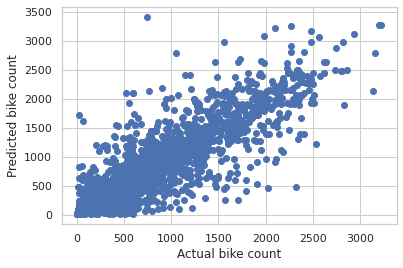

In [ ]:
plt.scatter(10**(y_test), 10**(y_predict_dtr))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')

**Not getting a good relation between actual and predicted values the relation is better than Lasso model.**

# **4. Implementing Random Forest Algorithm-**

In [ ]:
from sklearn.ensemble import RandomForestRegressor   
RFReg = RandomForestRegressor()
RFReg.fit(X_train, y_train)

y_predict_rfr = RFReg.predict((X_test))

In [ ]:
from sklearn import metrics

MSE  = mean_squared_error(10**(y_test), 10**(y_predict_rfr))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_predict_rfr))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_predict_rfr))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_predict_rfr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 54917.83977578855
MAE : 141.40308632236378
RMSE : 234.3455563389
R2 : 0.8617753725011478
Adjusted R2 :  0.8590387824380882


### **Applying RandomizeSearchCV for Random Forest -**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = RFReg, param_distributions = random_grid,
                               n_iter = 10, cv = 3, verbose=2, random_state=42,scoring="neg_mean_squared_error", n_jobs = 5)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Best parameters for Random Forest 
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 180}

In [ ]:
rf_random.best_score_

-0.03445789990766894

In [ ]:
y_predict_rfr_RSCV = rf_random.predict((X_test))

In [ ]:
r2 = r2_score(10**(y_test), 10**(y_predict_rfr_RSCV))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_predict_rfr_RSCV)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8575215415339943
Adjusted R2 :  0.8547007335441782


### Let's see the visual representation between Actual and Predicted value by using scatterplot-

Text(0, 0.5, 'Predicted bike count')

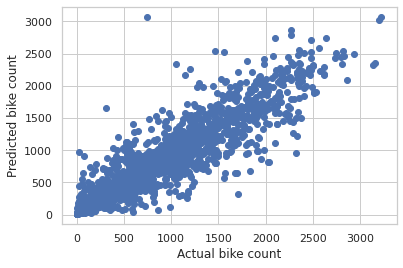

In [ ]:
plt.scatter(10**(y_test), 10**(y_predict_rfr_RSCV))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')

**Graph between actual and predicted for Random Forest is good than the Decision Tree model.**

# **5. Implementing XGBoost Algorithm-**

In [ ]:
import xgboost as xg
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb1 = XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

### **Applying GridSearchCv -**

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
# Fitting the model 
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   54.7s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [ ]:
# Best parameters for XGBoost
print(xgb_grid.best_score_)

0.9270707076352336


In [ ]:
# Best Parameters -

print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
# Applying the best parameters on XGBoost Model-

xg_reg = xg.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.7,learning_rate = 0.05,min_child_weight = 4,
                  max_depth=7,alpha = 10, n_estimators = 500, nthread = 4, silent = 1,subsample = .7)

xg_reg.fit(X_train,y_train)

y_predict_xgb = xg_reg.predict(X_test)

In [ ]:
from sklearn import metrics

MSE  = mean_squared_error(10**(y_test), 10**(y_predict_xgb))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_predict_xgb))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_predict_xgb))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_predict_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 48594.971133578714
MAE : 130.9611738030905
RMSE : 220.44267085475695
R2 : 0.8776896212473072
Adjusted R2 :  0.875268103655542


**As we  can see that we are getting a very good value of R2 and Adjusted R2.**
**Let's check the values of y_test and y_predict_xgb**

In [ ]:
y_test

3698    2.549003
5465    3.154424
6732    3.084576
5033    1.826075
6327    2.981819
          ...   
7832    3.153815
8043    2.387390
2906    2.510545
2404    1.913814
1905    2.143015
Name: Bike Count, Length: 2628, dtype: float64

In [ ]:
y_predict_xgb

array([2.462473 , 3.1071744, 3.088757 , ..., 2.48699  , 1.8432952,
       2.2880974], dtype=float32)

**So we can see here that the values are almost same.**

### Let's see the visual representation between Actual and Predicted value by using scatterplot-

Text(0, 0.5, 'Predicted bike count')

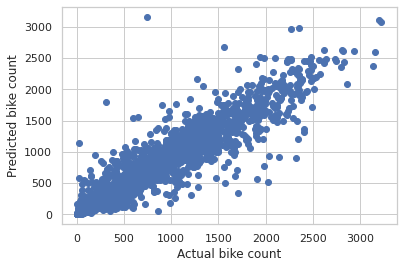

In [ ]:
plt.scatter(10**(y_test), 10**(y_predict_xgb))
plt.xlabel('Actual bike count')
plt.ylabel('Predicted bike count')

**We are getting good linear relation between actual and predicted.**



---



# **Comparison between different models-**

**Let's make the comparison between different model performance with respect to R2 and Adjusted R2 values -**

1. **Linear Regression-**

*   R2 Score -  0.6326705123041109
*   Adjusted R2 Score - 0.6253980729126162


2. **Lasso Regression-**

*   R2 Score - 0.6319563058761604
*   Adjusted R2 Score - 0.6246697265282117


3. **Dicision Tree-**

*   R2 Score - 0.7705060184265151
*   Adjusted R2 Score - 0.7659624652198972


4. **Random Forest-**

*   R2 Score - 0.8590723534971378
*   Adjusted R2 Score - 0.8562822486944802


5. **XGBoost Algorithm-**

*   R2 Score - 0.8776896212473072
*   Adjusted R2 Score - 0.875268103655542



# **Exploration conclusion-**

**Summary of exploratory data analysis-**

*   Working or Non-working Day We see 2 rental patterns across the day in bike rentals count - first.
for a Working Day where the rental count high at peak office hours (8am and 5pm) and the second
for a Non-working day where rental count is more or less uniform across the day with a peak at
around noon.
*   Temperature: People generally prefer to bike at moderate to high temperatures. We see highest
rental counts between 32 to 35 degrees Celsius.

*   Season: Demand of rental bikes is high between February to October.

*   Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest
on a snowy or rainy day.

*   Humidity: With increasing humidity, we see decrease in the number of bike rental count.







# **Conclusion -**

### So from the above operations we are coming to the conclusion that for XGBoost model performing very well than the other models. So in future if we want to do some prediction with this data then the XGBoost model will fit perfectly to do the prediction with good accuracy.

x